<a href="https://colab.research.google.com/github/therohitk1/Youtube-adview-Prediction/blob/main/Predict_Youtube_Adview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt


#importing data

In [ ]:
data_train = pd.read_csv("train.csv")
data_train.head()
data_train.shape

(14999, 9)

In [ ]:
#assigning each category a number for category feature
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data_train['category'] = data_train['category'].map(category)
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [ ]:
#Removing character "F" present in data
data_train = data_train[data_train.views != 'F']
data_train= data_train[data_train.likes != 'F']
data_train= data_train[data_train.dislikes != 'F']
data_train= data_train[data_train.comment != 'F']



In [ ]:
#Convert value to integers for views, likes, comments, dislike and adview
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"] = pd.to_numeric(data_train["adview"])

In [ ]:
column_vidid = data_train['vidid']

In [ ]:
#EnCoding features like category, duration, vivid
from sklearn.preprocessing import LabelEncoder
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [ ]:
#Convert Time_in_sec for duration
import datetime
import time
def checki(x):
  train=pd.read_csv("train.csv")
  mp = pd.read_csv("train.csv")["duration"]
  time = mp.apply(checki)


  def func_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

  time1 = time.apply(func_sec)

  data_train['duration'] = time1
  data_train.head()


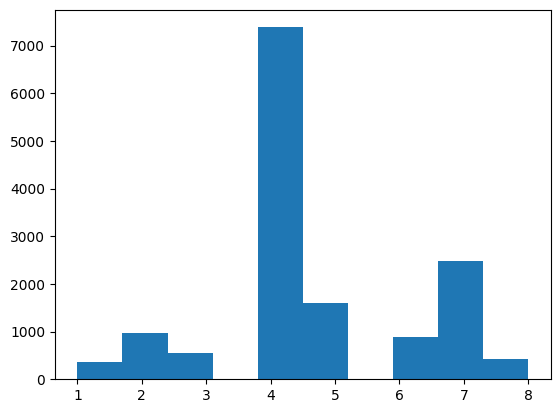

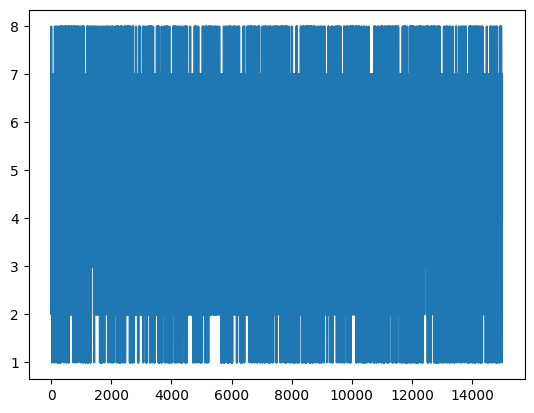

In [ ]:
#Visualization
#individual plots
plt.hist(data_train["category"])
plt.show()
plt.plot(data_train["category"])
plt.show()


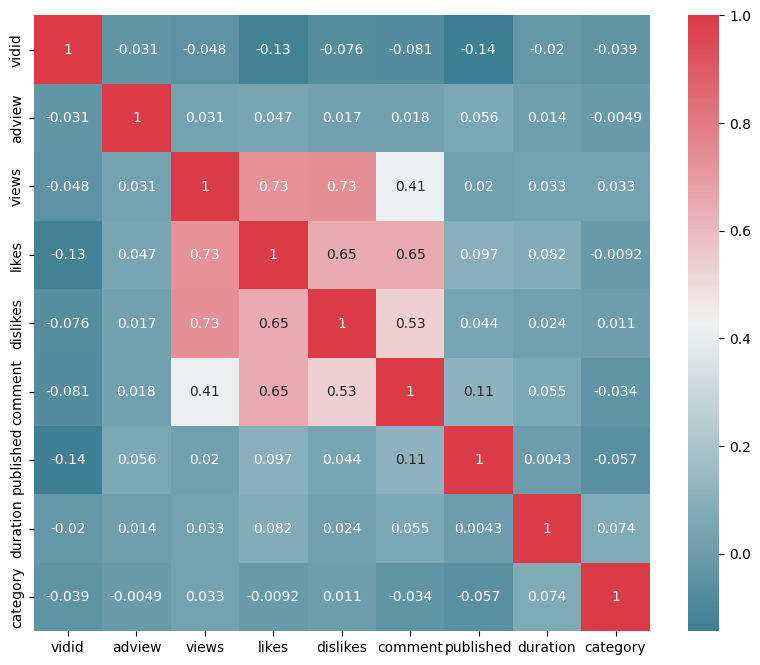

In [ ]:
#Remove videos with adview greater than 2000000 as outlier
data_train = data_train[data_train['adview'] < 2000000]
                        #Heatmap
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
corr = data_train.corr()
# Use np.bool_ instead of np.bool for the mask
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool_), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [ ]:
#Split data
y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train = data_train.drop(['adview'], axis = 1)
data_train = data_train.drop(['vidid'], axis = 1)
data_train.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, y_train, test_size = 0.2, random_state = 42)
X_train.shape


(11708, 7)

In [ ]:
#Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
#Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [ ]:
#Linear regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train_scaled, y_train)
print_error(X_test_scaled, y_test, linear_regression)


Mean Absolute Error: 3718.9740619231147
Mean Squared Error: 835886630.8152658
Root Mean Squared Error: 28911.70404551184


In [ ]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_scaled, y_train)
print_error(X_test_scaled, y_test, decision_tree)

Mean Absolute Error: 2067.4494535519125
Mean Squared Error: 436687319.0143443
Root Mean Squared Error: 20897.06484208594


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators =200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train_scaled, y_train)
print_error(X_test_scaled, y_test, random_forest)

<ipython-input-17-4c02e6efa2f9>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train_scaled, y_train)


Mean Absolute Error: 3297.4470488279894
Mean Squared Error: 456196929.1084091
Root Mean Squared Error: 21358.767031558942


In [ ]:
#Support Vector Machine
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train_scaled, y_train)
print_error(X_test_scaled, y_test, supportvector_regressor)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 1696.9654361489104
Mean Squared Error: 833686308.880427
Root Mean Squared Error: 28873.626528034663


In [ ]:
#Artificial Neural Networks
import keras
from keras.layers import Dense
ann= keras.models.Sequential([
    Dense(6,activation="relu",
    input_shape=X_train.shape[1:]),
    Dense(6,activation="relu"),
    Dense(1)
    ])

optimizers = keras.optimizers.Adam()
loss = keras.losses.mean_squared_error
ann.compile(optimizer=optimizers,loss=loss,metrics=["mean_squared_error"])
history = ann.fit(X_train_scaled,y_train,epochs=100)
ann.summary()

print_error(X_test_scaled, y_test, ann)


Epoch 1/100
366/366 [==============================] - 2s 2ms/step - loss: 767405568.0000 - mean_squared_error: 767405568.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767396160.0000 - mean_squared_error: 767396160.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767374656.0000 - mean_squared_error: 767374656.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767329984.0000 - mean_squared_error: 767329984.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767252736.0000 - mean_squared_error: 767252736.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767137408.0000 - mean_squared_error: 767137408.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767001280.0000 - mean_squared_error: 767001280.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 766841664.0000 - mean_squared_error:

In [21]:
#Saving Scikitlearn models
import joblib
joblib.dump(linear_regression, 'linear_regression.pkl')

#Saving keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")


# Save the predicted column in a csv file named 'PredictedAdview.csv'
best_model = random_forest
predictions = best_model.predict(X_test_scaled)
predicted_df = pd.DataFrame(predictions, columns=['PredictedAdview'])
predicted_df.to_csv('PredictedAdview.csv', index=False)

print("Predictions saved to 'PredictedAdview.csv'.")







Predictions saved to 'PredictedAdview.csv'.
